# Popular Data Science Questions

In this project, we will use [Data Science Stack Exchange](https://datascience.stackexchange.com/) (DSSE) to determine what content should a data science education company create based on the answer to the question "*What is it that people want to learn about in data science?*".


## Stack Exchange

**What kind of questions are welcome on this site?**

On DSSE's help centre *Asking* section, we can find that we should:

- Avoid subjective questions
- Ask practical, answerable questions about Data Science
- Ask specific questions
- Make questions relevant to others

**What, other than questions, does DSSE's [home](https://datascience.stackexchange.com/) subdivide into?**

There are four sections on the home page:

- [Questions](https://datascience.stackexchange.com/questions) — a list of all questions asked
- [Tags](https://datascience.stackexchange.com/tags) — a list of tags (keywords or labels that categorise questions)
- [Users](https://datascience.stackexchange.com/users) — a list of users
- [Unanswered](https://datascience.stackexchange.com/unanswered) — a list of unanswered questions

The tagging system used by Stack Exchange looks exactly like what we need to achieve the main goal of this project since it enables us to quantify how many questions are asked about each subject.

**What information is available in each post?**

Some of the information we find is:

- For both questions and answers:
 - The posts' score
 - The posts' title
 - The posts' author
 - The posts' body


- For questions only:
 - When the question was asked
 - How long the question has been active
 - Number of views
 - Related questions
 - The question's tags
 
 
 ## Stack Exchange Data Explorer (SEDE)
 
Investigating a few of the tables, the following ones sound more promising for our goal.

- Posts
- PostTags
- Tags
- TagSynonyms

After running a few queries to get a feel for the data, the `Tags` table looked very appropriate as it informs us how many times each tag was used. 


| Id  | TagName          | Count | ExcerptPostId | WikiPostId |
|-----|------------------|-------|---------------|------------|
| 2   | machine-learning | 9203  | 4909          | 4908       |
| 46  | python           | 5414  | 5523          | 5522       |
| 194 | deep-learning    | 3916  | 8956          | 8955       |
| 81  | neural-network   | 3759  | 8885          | 8884       |
| 77  | classification   | 2652  | 4911          | 4910       |
| 324 | keras            | 2397  | 9251          | 9250       |
| 47  | nlp              | 1931  | 147           | 146        |
| 128 | scikit-learn     | 1851  | 5896          | 5895       |
| 321 | tensorflow       | 1842  | 9183          | 9182       |
| 72  | time-series      | 1391  | 8904          | 8903       |


However, it doesn't let us know if the interest in the subject is recent or not. Therefore, we decided to focus on the `Posts` table.


## Getting the Data

The `Posts` table has a lot of columns. We'll be focusing our attention on those that seem relevant towards our goal:

- **`Id`:** An identification number for the post.
- **`PostTypeId`:** An identification number for the type of post.

|        | PostTypes           |
|--------|---------------------|
| **Id** | **Name**            |
| 1      | Question            |
| 2      | Answer              |
| 3      | Wiki                |
| 4      | TagWikiExcerpt      |
| 5      | TagWiki             |
| 6      | ModeratorNomination |
| 7      | WikiPlaceholder     |
| 8      | PrivilegeWiki       |

- **`CreationDate`:** The date and time of creation of the post.
- **`Score`:** The post's score.
- **`ViewCount`:** How many times the post was viewed.
- **`Tags`**: What tags were used.
- **`AnswerCount`:** How many answers the question got (only applicable to question posts).
- **`FavoriteCount`:** How many times the question was favoured (only applicable to question posts).


There are eight different types of posts, but we'll just focus on the questions, limiting our analysis to the posts of 2019.

To get the relevant data, we run the following query.

~~~
SELECT Id, PostTypeId, CreationDate, Score, ViewCount, 
       Tags, AnswerCount, FavoriteCount
  FROM Posts
 WHERE PostTypeId = 1 
   AND YEAR(CreationDate) = 2019;
~~~   

That's how the first few rows look like:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-1wig{font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-j6zm{font-weight:bold;text-align:left;vertical-align:bottom}
.tg .tg-7zrl{text-align:left;vertical-align:bottom}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-1wig">Id</th>
    <th class="tg-j6zm">PostTypeId</th>
    <th class="tg-j6zm">CreationDate</th>
    <th class="tg-j6zm">Score</th>
    <th class="tg-j6zm">ViewCount</th>
    <th class="tg-j6zm">Tags</th>
    <th class="tg-j6zm">AnswerCount</th>
    <th class="tg-j6zm">FavoriteCount</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-7zrl">49683</td>
    <td class="tg-7zrl">1</td>
    <td class="tg-7zrl">21/04/2019 16:15</td>
    <td class="tg-7zrl">3</td>
    <td class="tg-7zrl">228</td>
    <td class="tg-7zrl">&lt;machine-learning&gt;&lt;scikit-learn&gt;&lt;sampling&gt;</td>
    <td class="tg-7zrl">2</td>
    <td class="tg-7zrl"></td>
  </tr>
  <tr>
    <td class="tg-7zrl">49686</td>
    <td class="tg-7zrl">1</td>
    <td class="tg-7zrl">21/04/2019 16:54</td>
    <td class="tg-7zrl">0</td>
    <td class="tg-7zrl">199</td>
    <td class="tg-7zrl">&lt;dataset&gt;&lt;pandas&gt;</td>
    <td class="tg-7zrl">1</td>
    <td class="tg-7zrl"></td>
  </tr>
  <tr>
    <td class="tg-7zrl">49688</td>
    <td class="tg-7zrl">1</td>
    <td class="tg-7zrl">21/04/2019 18:05</td>
    <td class="tg-7zrl">1</td>
    <td class="tg-7zrl">277</td>
    <td class="tg-7zrl">&lt;machine-learning&gt;&lt;python&gt;&lt;time-series&gt;&lt;regression&gt;&lt;forecasting&gt;</td>
    <td class="tg-7zrl">0</td>
    <td class="tg-7zrl"></td>
  </tr>
  <tr>
    <td class="tg-7zrl">49693</td>
    <td class="tg-7zrl">1</td>
    <td class="tg-7zrl">21/04/2019 20:06</td>
    <td class="tg-7zrl">0</td>
    <td class="tg-7zrl">169</td>
    <td class="tg-7zrl">&lt;r&gt;&lt;time-series&gt;&lt;data-analysis&gt;</td>
    <td class="tg-7zrl">2</td>
    <td class="tg-7zrl">1</td>
  </tr>
  <tr>
    <td class="tg-7zrl">49697</td>
    <td class="tg-7zrl">1</td>
    <td class="tg-7zrl">21/04/2019 22:44</td>
    <td class="tg-7zrl">0</td>
    <td class="tg-7zrl">257</td>
    <td class="tg-7zrl">&lt;python&gt;&lt;random-forest&gt;&lt;feature-extraction&gt;</td>
    <td class="tg-7zrl">1</td>
    <td class="tg-7zrl"></td>
  </tr>
</tbody>
</table>


## Exploring the Data

Looking at each row, we see that the `FavouriteCount` column has missing values. Let's explore the data.

In [1]:
# Import everything that we'll use

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Read in and explore the data
questions = pd.read_csv('2019_questions.csv', parse_dates=['CreationDate'])
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


We see that only `FavoriteCount` has missing values. A missing value in this column possibly means the question is not bookmarked in any users' favourite list, so we can replace the missing values with zero.

The data types seem appropriate for almost every column. After we fill in the missing values in `FavoriteCount`, we will convert them to integer numbers.

Since the object data type can contain multiple different types, let's check what types the objects in the column `Tags` are.

In [3]:
questions["Tags"].apply(lambda tag: type(tag)).unique()

array([<class 'str'>], dtype=object)

We see that every value in this column is a string. However, we will transform these values into a list of strings to be more suitable to use typical string methods.

## Cleaning the Data

In [4]:
# Fill in missing values in FavoriteCount and convert them to integer type
questions['FavoriteCount'].fillna(0, inplace=True)
questions['FavoriteCount'] = questions['FavoriteCount'].astype(int)
questions.dtypes

Id                        int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount             int64
dtype: object

In [5]:
# Transform Tags column into a list of strings
questions["Tags"] = questions["Tags"].str.replace("^<|>$", "").str.split('><')
questions['Tags'].sample(5)

746                                                 [cnn]
389     [machine-learning, python, scikit-learn, class...
1477                       [machine-learning, regression]
9       [machine-learning, python, deep-learning, kera...
8293    [machine-learning, python, data-science-model,...
Name: Tags, dtype: object

## Most Used and Most Viewed

We'll focus on determining the most popular tags, considering two different popularity proxies: for each, tag we'll count how many times the tag was used, and how many times a question with that tag was viewed.

Let's start by counting how many times each tag was used.

In [6]:
tag_count = {}
for tags in questions['Tags']:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1

For better aesthetics, let's transform tag_count dictionary into a dataframe.

In [7]:
tag_count = pd.DataFrame.from_dict(data=tag_count, orient='index')
tag_count.rename(columns={0: 'Count'}, inplace=True)
tag_count.head(10)

,Count
q-learning,37
labels,28
image,32
seaborn,38
prediction,128
beginner,27
gan,85
tokenization,6
time,5
hierarchical-data-format,7


Let's now sort this dataframe by `Count` and visualise the top 20 results.

In [8]:
most_used = tag_count.sort_values(by='Count').tail(20)
most_used

,Count
machine-learning-model,224
statistics,234
clustering,257
predictive-modeling,265
r,268
dataset,340
regression,347
pandas,354
lstm,402
time-series,466


The threshold of 20 is somewhat arbitrary and we can experiment with others, however, the popularity of the tags rapidly declines, so looking at these tags should be enough to help us with our goal. Let's visualise these data.

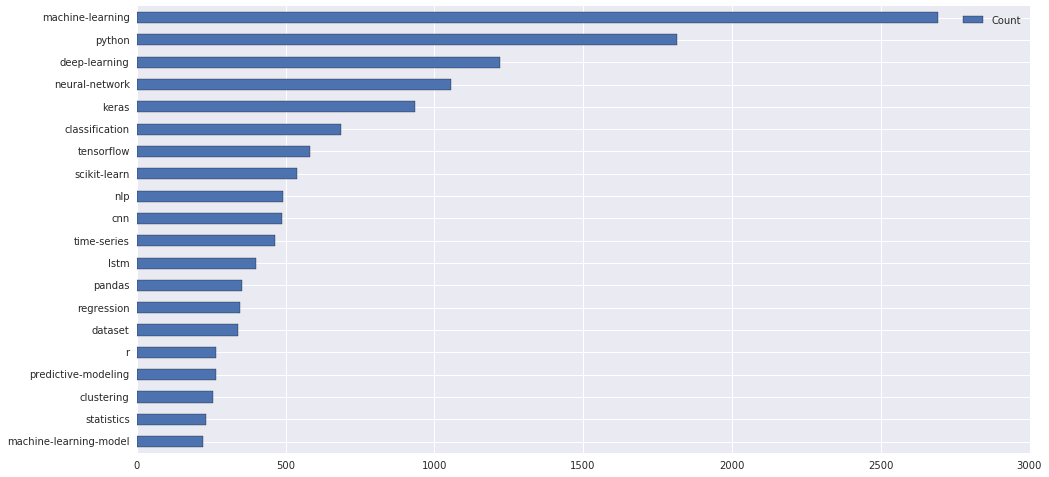

In [9]:
most_used.plot(kind='barh', figsize=(16, 8))

Some tags are quite vague and are unlikely to be useful; e.g.: `python`, `dataset`, `r`. Before we investigate the tags a little deeper, let's repeat the same process for views.

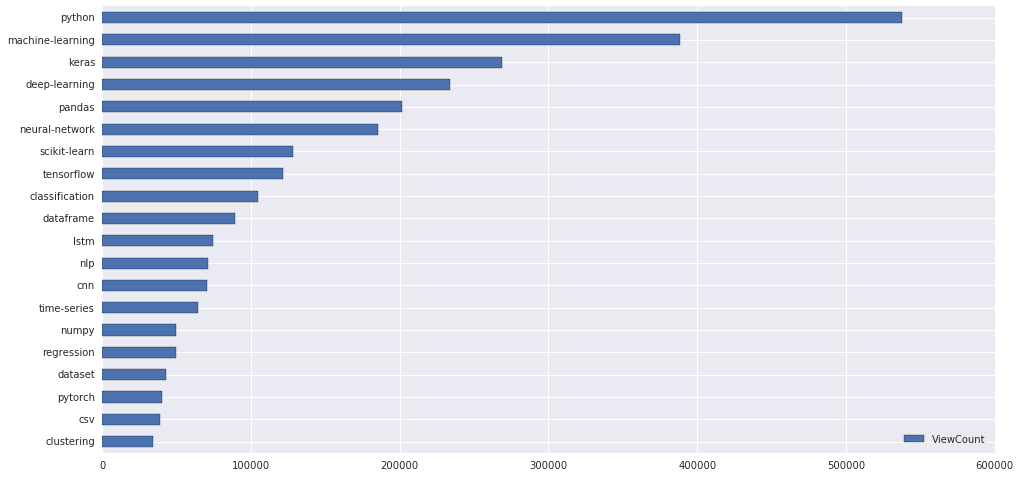

In [10]:
tag_view_count = {}

for index, row in questions.iterrows():
    for tag in row['Tags']:
        if tag in tag_view_count:
            tag_view_count[tag] += row['ViewCount']
        else:
            tag_view_count[tag] = row['ViewCount']  
            

# Transform tag_view_count dictionary into a dataframe
tag_view_count = pd.DataFrame.from_dict(data=tag_view_count, orient='index')
tag_view_count.rename(columns={0: 'ViewCount'}, inplace=True)

# Sort this dataframe by ViewCount and visualize the top 20 results
most_viewed = tag_view_count.sort_values(by='ViewCount').tail(20)

# Visualize the data
most_viewed.plot(kind='barh', figsize=(16, 8))

Let's see them side by side.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f054f53bd30>],
      dtype=object)

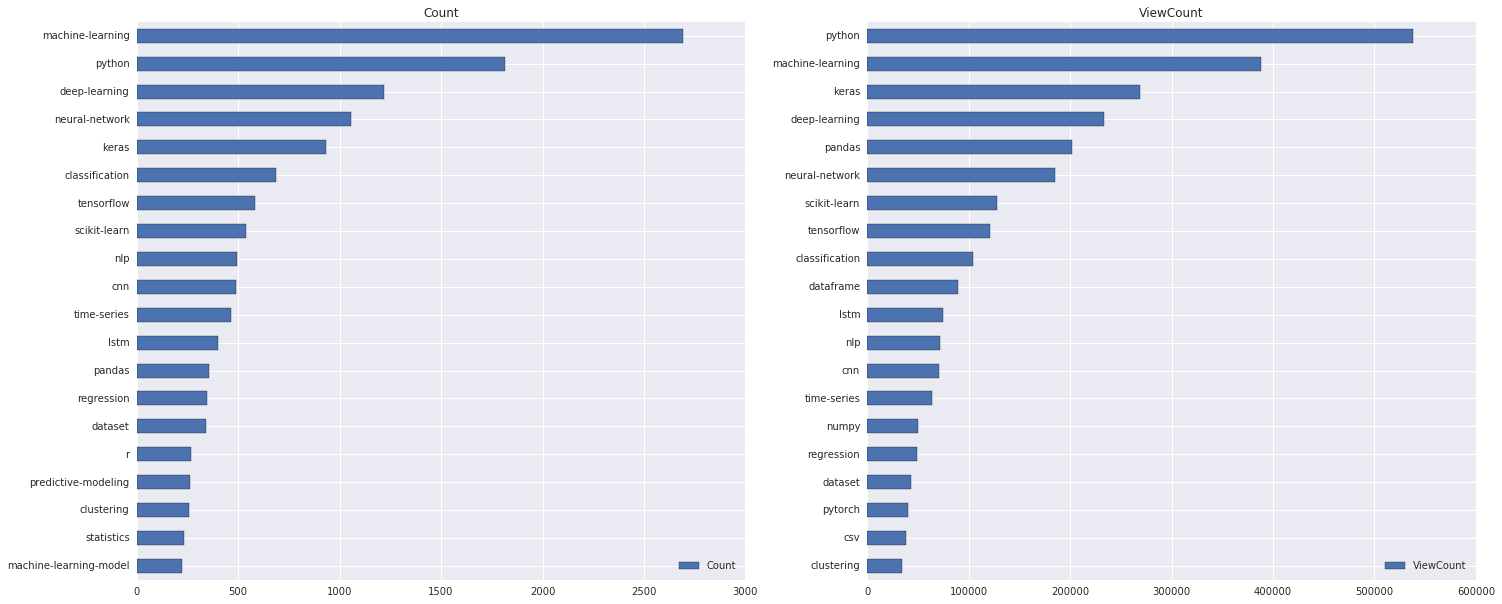

In [11]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(24, 10))
most_used.plot(kind='barh', ax=axs[0], subplots=True)
most_viewed.plot(kind='barh', ax=axs[1], subplots=True)

## Enter Domain Knowledge

From the top 10 tags of each proxy, here's a list of the tags in common:
- `python`
- `machine-learning` 
- `deep-learning` 
- `neural-network` 
- `keras`
- `tensorflow`
- `classification` 
- `scikit-learn`

Someone with enough domain knowledge could tell most of the top tags are all closely related to one central machine learning topic: *deep learning*.


## Just a fad?

Before we officially make our recommendation, let's solidify our findings with additional proof. More specifically, one thing that comes to mind is "Is deep learning just a fad?", "Could interest in deep learning be slowing down?".

The file `all_questions.csv` holds the result of the query below — this query fetches all of the questions ever asked on DSSE, their dates and tags.

~~~
SELECT Id, CreationDate, Tags
  FROM posts
 WHERE PostTypeId = 1;
~~~

In [12]:
# Read in the file into a dataframe, parsing the dates at read-time
all_q = pd.read_csv('all_questions.csv', parse_dates=['CreationDate'])

We'll use the same technique as before to clean the tags column.

In [13]:
all_q['Tags'] = all_q['Tags'].str.replace('^<|>$', '').str.split('><')

Before deciding which questions should be classified as being deep learning questions, we should decide what tags are deep learning tags.

The definition of what constitutes a deep learning tag we'll use is: a tag that belongs to the list [`'lstm', 'cnn', 'scikit-learn', 'tensorflow', 'keras', 'neural-network', 'deep-learning'`].

We'll now create a function that assigns `1` to deep learning questions and `0` otherwise; and we use it.

In [14]:
def class_deep_learning(tags):
    for tag in tags:
        if tag in ['lstm', 'cnn', 'scikit-learn', 'tensorflow', 'keras', 'neural-network', 'deep-learning']:
            return 1
    return 0

In [15]:
all_q['DeepLearning'] = all_q['Tags'].apply(class_deep_learning)

In [16]:
all_q.sample(5)

,Id,CreationDate,Tags,DeepLearning
8180,18572,2017-04-25 04:19:37,"[machine-learning, distribution]",0
5378,17193,2017-02-26 15:05:30,"[neural-network, tensorflow, regularization, d...",1
8428,41133,2018-11-12 23:38:39,"[machine-learning, neural-network, svm, backpr...",1
21537,36872,2018-08-13 12:52:30,[reinforcement-learning],0
4926,39181,2018-10-04 10:55:40,"[data-mining, feature-extraction]",0


The data science landscape isn't so dynamic to merit daily, weekly or even monthly tracking. Let's track it quarterly.

Since we don't have all the data for the first quarter of 2020, we'll get rid of those dates.

In [17]:
all_q = all_q[all_q['CreationDate'].dt.year < 2020]

Let's create a column that identifies the quarter in which a question was asked.

In [18]:
def fetch_quarter(datetime):
    year = str(datetime.year)[-2:]
    quarter = str(((datetime.month-1) // 3) + 1)
    return "{y}Q{q}".format(y=year, q=quarter)

all_q["Quarter"] = all_q["CreationDate"].apply(fetch_quarter)

In [19]:
all_q.head()

,Id,CreationDate,Tags,DeepLearning,Quarter
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",1,19Q1
1,45418,2019-02-12 00:50:39,[neural-network],1,19Q1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0,19Q1
3,45426,2019-02-12 04:51:49,[keras],1,19Q1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0,19Q1


For the final part of our analysis, we'll group by quarter and:

- Count the number of deep learning questions
- Count the total number of questions
- Calculate the ratio between the two numbers above

In [20]:
quarterly = all_q.groupby('Quarter').agg({'DeepLearning':['sum', 'size']})
quarterly.columns = ['DeepLearningQuestions', 'TotalQuestions']
quarterly['DeepLearningRate'] = quarterly['DeepLearningQuestions'] / quarterly['TotalQuestions']

# The following is done to help with visualizations later
quarterly.reset_index(inplace=True)
quarterly.sample(5)

,Quarter,DeepLearningQuestions,TotalQuestions,DeepLearningRate
14,17Q4,353,898,0.393096
9,16Q3,161,585,0.275214
5,15Q3,45,311,0.144695
6,15Q4,66,382,0.172775
13,17Q3,247,714,0.345938


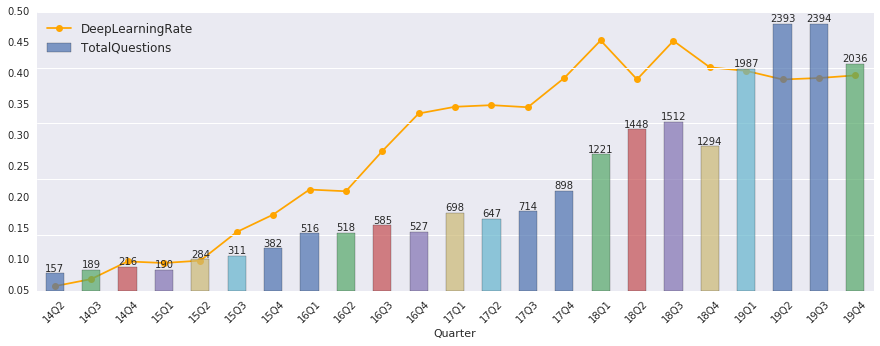

In [21]:
# Adding the plots
ax1 = quarterly.plot(x="Quarter", y="DeepLearningRate",
                    kind="line", linestyle="-", marker="o", color="orange",
                    figsize=(15,5)
                    )

ax2 = quarterly.plot(x="Quarter", y="TotalQuestions",
                     kind="bar", ax=ax1, secondary_y=True, alpha=0.7, rot=45)

# Adding separate tick lables
for idx, t in quarterly["TotalQuestions"].iteritems():
    ax2.text(idx, t, str(t), ha="center", va="bottom")

# Setting up the legend
ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 12})

# Hiding top and right spines
for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)

It appears that deep learning questions have been a high-growth trend since the beginning of DSSE, and it looks like it has been stabilising.
No evidence suggests the interest in deep learning has been decreasing, therefore, we will keep our previous idea of creating deep learning content.